In [1]:
!pip install matplotlib scikit-learn

# Generating the Dataset
We generate a nonlinear “two moons” dataset using make_moons, which is ideal for demonstrating why PCA fails and Kernel PCA succeeds.

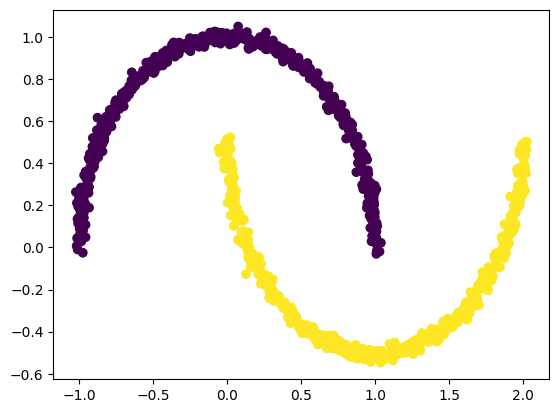

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.02, random_state=123)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Applying PCA on the dataset
The PCA visualization shows that the two moon-shaped clusters remain intertwined even after dimensionality reduction. This happens because PCA is a strictly linear technique—it can only rotate, scale, or flatten the data along straight directions of maximum variance. Since the “two moons” dataset has a nonlinear structure, PCA is unable to separate the classes or untangle the curved shapes. As a result, the transformed data still looks almost identical to the original pattern, and the two classes remain overlapped in the projected space.

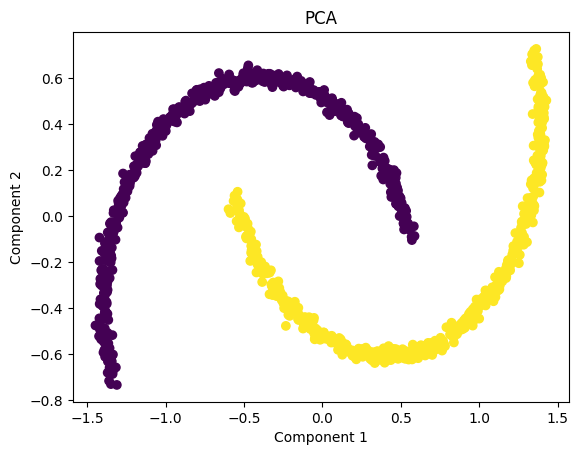

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Applying Kernel PCA on the dataset
We now apply Kernel PCA using an RBF kernel, which maps the nonlinear data into a higher-dimensional space where it becomes linearly separable. In the kernel space the two classes in our dataset are linearly separable. Kernel PCA uses a kernel function to project the dataset into a higher-dimensional space, where it is linearly separable.

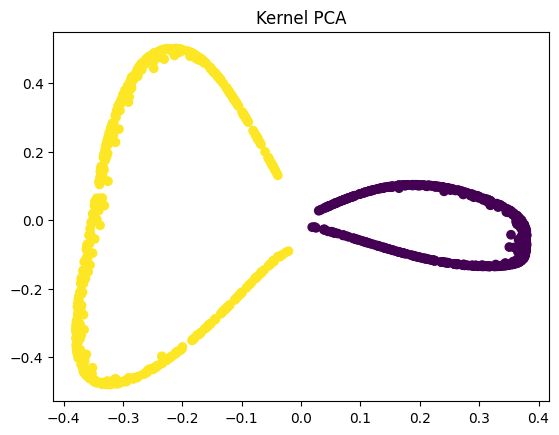

In [7]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()

The goal of PCA (and dimensionality reduction in general) is not just to compress the data—it’s to reveal the underlying structure in a way that preserves meaningful variation. In nonlinear datasets like the two-moons example, traditional PCA cannot “unfold” the curved shapes because it only applies linear transformations.

Kernel PCA, however, performs a nonlinear mapping before applying PCA, allowing the algorithm to untangle the moons into two clearly separated clusters. This separation is valuable because it makes downstream tasks like visualization, clustering, and even classification far more effective. When the data becomes linearly separable after transformation, simple models—such as linear classifiers—can successfully distinguish between the classes, something that would be impossible in the original or PCA-transformed space.